# Pymaceuticals Inc.
---

### Analysis

This data highlights significant differences in treatment efficacy among the drug regimens studied. Capomulin and Ramicane demonstrate comparable effectiveness, both surpassing Infubinol and Ceftamin. Additionally, a strong correlation (r = 0.95) between mouse weight and treatment response suggests heavier mice tend to exhibit less favorable outcomes. Notably, the study's consistency is underscored by the presence of only one outlier among the top-performing drugs and none for Capomulin, enhancing the reliability of the findings.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = len(combined_df["Mouse ID"].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_df = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_df = duplicate_rows_df["Mouse ID"].unique()
duplicate_mouse_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = combined_df.set_index("Mouse ID")
duplicate_info.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
clean_data_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total = len(clean_data_df ["Mouse ID"].unique())
cleaned_total

248

In [7]:
print(type(cleaned_total))

<class 'int'>


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_var,
                           "Tumor Volume Std. Dev.": tumor_var, "Tumor Volume Std. Dev.": tumor_std, "Tumor Volume Std. Err.": tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

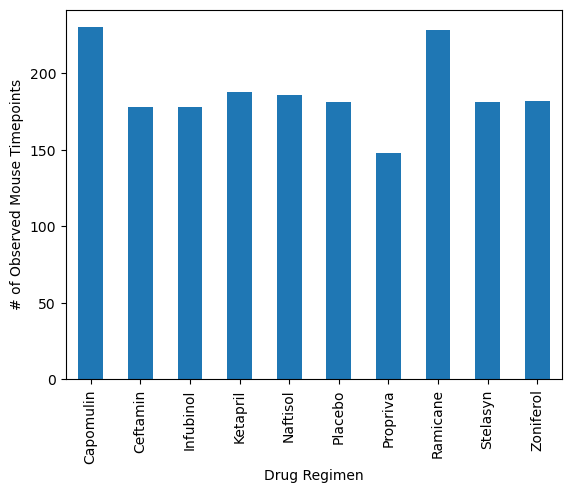

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_chart = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

pandas_bar_chart.plot.bar()

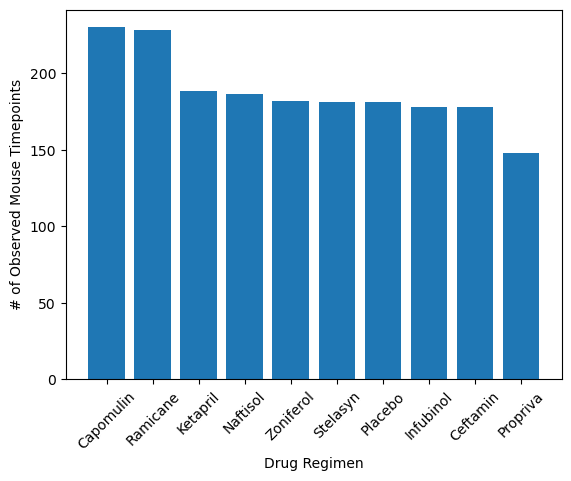

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_bar_chart = clean_data_df["Drug Regimen"].value_counts()

plt.bar(pyplot_bar_chart.index.values,pyplot_bar_chart.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

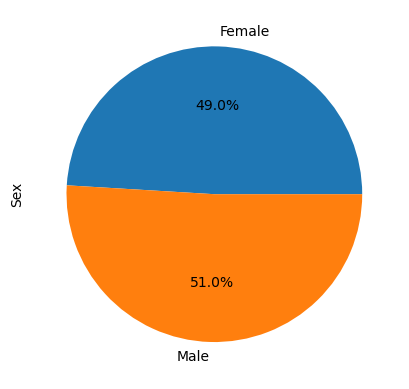

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas_pie = clean_data_df.groupby(["Sex"])["Sex"].count()
gender_pandas_pie.plot.pie(autopct="%1.1f%%")

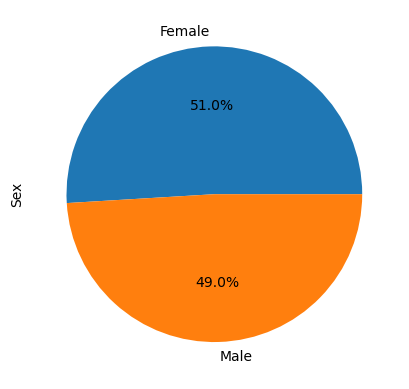

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot_pie =  clean_data_df["Sex"].value_counts()

plt.pie(gender_pyplot_pie.values, labels=gender_pandas_pie.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin, Ramicane, Infubinol, and Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tp_df = pd.merge(clean_data_df, max_tp, on=("Mouse ID", "Timepoint"), how='left')

max_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty dictionary to store tumor volume data for each regimen
tumor_volume_data = {regimen: [] for regimen in treatment_regimens}

# Calculate and store tumor volume data for each regimen
for regimen in treatment_regimens:
    # Filter data for the current regimen
    regimen_data = max_tp_df[max_tp_df["Drug Regimen"] == regimen]
    
    # Append tumor volume data to the corresponding list
    tumor_volume_data[regimen] = regimen_data["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and determine potential outliers for each regimen
outliers = {}
for regimen in treatment_regimens:
    # Get tumor volume data for the current regimen
    data = tumor_volume_data[regimen]
    
    # Calculate quartiles and IQR
    quartiles = np.percentile(data, [25, 50, 75])
    lower_quartile = quartiles[0]
    upper_quartile = quartiles[2]
    iqr = upper_quartile - lower_quartile
    
    # Determine lower and upper bounds for outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    regimen_outliers = [value for value in data if value < lower_bound or value > upper_bound]
    
    # Store outliers for the current regimen
    outliers[regimen] = regimen_outliers

# Display potential outliers for each regimen
for regimen, regimen_outliers in outliers.items():
    print(f"Potential outliers for {regimen}: {regimen_outliers}")

Potential outliers for Capomulin: [25.47214326, 23.34359787]
Potential outliers for Ramicane: [22.05012627]
Potential outliers for Infubinol: []
Potential outliers for Ceftamin: []


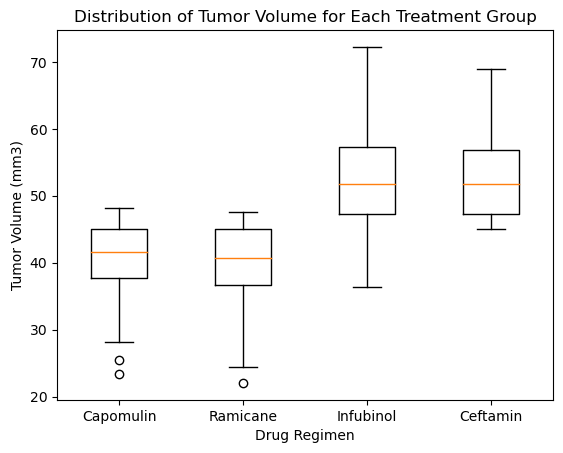

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Extract tumor volume data for each treatment regimen
tumor_volume_data = [max_tp_df[max_tp_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].values 
                     for regimen in treatment_regimens]

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatment_regimens)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show plot
plt.show()

## Line and Scatter Plots

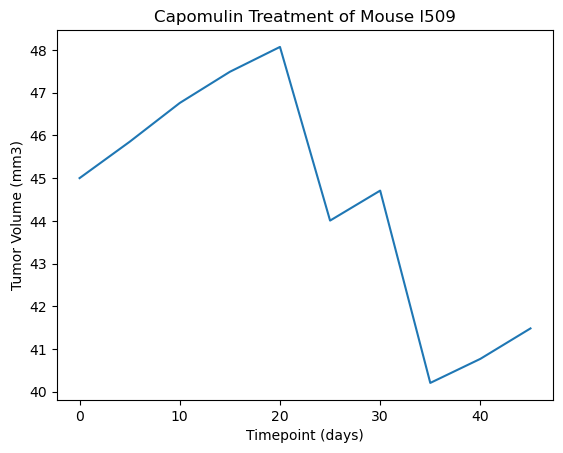

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
single_mouse_data = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

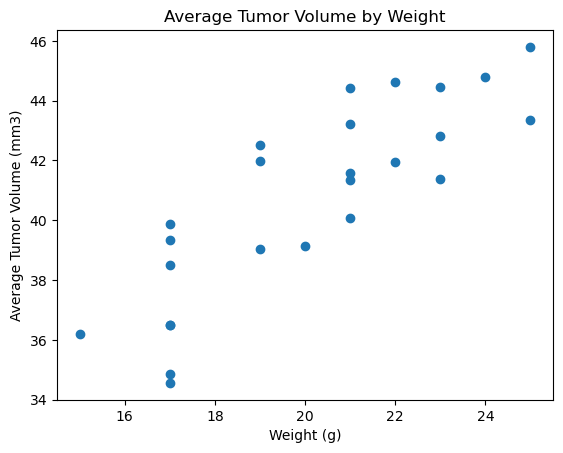

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto capomulin_df and drop duplicates
final_avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

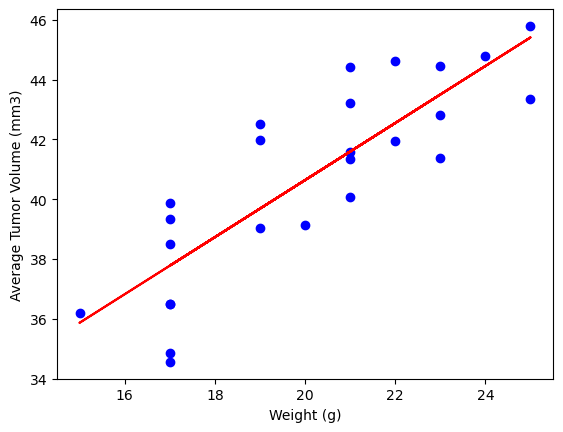

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'])
regress_values = final_avg_vol_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'])

# Add labels and title
plt.scatter(final_avg_vol_df['Weight (g)'], final_avg_vol_df['avg_tumor_vol'], color='blue', label='Data')
plt.plot(final_avg_vol_df['Weight (g)'], regress_values, color='red', label='Linear Regression')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()